In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_cpi = pd.read_csv("cpi.csv") #pandas assumes us date format month first #nulls at end [ONLY]

df_ber = pd.read_csv("t10y.csv") #pandas assumes us date format month first #nulls in middle
df_ber['date'] = pd.to_datetime(df_ber['DATE'])
df_ber['year'] = pd.to_datetime(df_ber['DATE']).dt.year
df_ber['month'] = pd.to_datetime(df_ber['DATE']).dt.month
 
df_ber_irt = df_ber.groupby(['year','month']).agg({'T10YIE':['mean']})
df_ber_irt = df_ber_irt.reset_index()

df_ber_irt['ber_rate'] = ((((df_ber_irt[df_ber_irt.columns[2]]/100) + 1) ** (1/12)) -1)*100

In [2]:
#This difference can be interpreted as what the market views will be the inflation rate for the next 10 years, on average.
df_ber_irt[df_ber_irt['year'] == 2013]


,year,month,T10YIE,ber_rate
,,,mean,
120,2013,1,2.523333,0.207884
121,2013,2,2.554737,0.210442
122,2013,3,2.542500,0.209445
123,2013,4,2.411364,0.198760
124,2013,5,2.283182,0.188303
125,2013,6,2.048500,0.169126
126,2013,7,2.122273,0.175159
127,2013,8,2.184545,0.180248
128,2013,9,2.145500,0.177057


In [3]:
df_cpi = pd.read_csv("cpi.csv") #pandas assumes us date format month first #nulls at end [ONLY]

df_cpi['date'] = pd.to_datetime(df_cpi['date'])
df_cpi = df_cpi[df_cpi['date'].dt.day == 1]
df_cpi.index = np.arange(len(df_cpi))
df_cpi = df_cpi.dropna()
df_cpi.head().append(df_cpi.tail())

,date,CPI
0,2008-07-01,100.00000
1,2008-08-01,100.52510
2,2008-09-01,100.12380
3,2008-10-01,99.98538
4,2008-11-01,98.97539
131,2019-06-01,117.03590
132,2019-07-01,117.05920
133,2019-08-01,117.25480
134,2019-09-01,117.24880
135,2019-10-01,117.34070


In [4]:
df_ber_irt.head().append(df_ber_irt.tail())

,year,month,T10YIE,ber_rate
,,,mean,
0,2003,1,1.754286,0.145028
1,2003,2,1.912632,0.158006
2,2003,3,1.862857,0.153928
3,2003,4,1.774762,0.146707
4,2003,5,1.660952,0.137370
198,2019,7,1.752727,0.144900
199,2019,8,1.586364,0.131245
200,2019,9,1.587000,0.131298
201,2019,10,1.560909,0.129154


In [5]:
df_cpi_ar1 = pd.read_csv('cpi_seasonal_ar1.csv')
df_cpi_ar1.head().append(df_cpi_ar1.tail())

,Unnamed: 0,date,CPI,IRt,IRt_log,month,IRT_corrected,seasonal_correction,AR1_predictions
0,6,2009-01-01,96.07569,-0.010342,-0.010342,1,-0.007781,-0.002561,-0.002561
1,7,2009-02-01,96.49385,0.004352,0.004352,2,0.001285,0.003067,0.002912
2,8,2009-03-01,96.97369,0.004973,0.004973,3,0.001017,0.003956,0.005782
3,9,2009-04-01,97.20951,0.002432,0.002432,4,-0.002287,0.004719,0.006487
4,10,2009-05-01,97.45218,0.002496,0.002496,5,-0.000682,0.003178,0.004224
125,131,2019-06-01,117.03590,0.002129,0.002129,6,-0.000485,0.002614,0.004622
126,132,2019-07-01,117.05920,0.000199,0.000199,7,-0.001512,0.001712,0.003151
127,133,2019-08-01,117.25480,0.001671,0.001671,8,0.001909,-0.000238,0.000977
128,134,2019-09-01,117.24880,-0.000051,-0.000051,9,-0.001367,0.001316,0.003279
129,135,2019-10-01,117.34070,0.000784,0.000784,10,-0.000779,0.001563,0.002809


In [6]:
#Monthly rates for CPI
CPI = df_cpi['CPI'].to_numpy()
IRt = [0] #0 added to assign inflation rate to the month it is reported
IRt_log = [0]
for _ in range(1,len(CPI)):
    IRt.append(100*(CPI[_]-CPI[_-1])/CPI[_-1])
    IRt_log.append(100*np.log(CPI[_])-np.log([_-1])) 
#IRt.append(float("NaN"))
#IRt_log.append(float("NaN"))
df_cpi['IRt']=IRt
df_cpi['IRt_log']=IRt
#IRt is stored in the month it relates to. Therefore the final month has no Inflation (since the next months value is unknown)
df_cpi = df_cpi.dropna()
df_cpi.head(10).append(df_cpi.tail())

C:\Users\micha\AppData\Local\Temp/ipykernel_6576/3207213186.py:7: RuntimeWarning: divide by zero encountered in log
  IRt_log.append(100*np.log(CPI[_])-np.log([_-1]))


,date,CPI,IRt,IRt_log
0,2008-07-01,100.00000,0.000000,0.000000
1,2008-08-01,100.52510,0.525100,0.525100
2,2008-09-01,100.12380,-0.399204,-0.399204
3,2008-10-01,99.98538,-0.138249,-0.138249
4,2008-11-01,98.97539,-1.010138,-1.010138
5,2008-12-01,97.07973,-1.915284,-1.915284
6,2009-01-01,96.07569,-1.034243,-1.034243
7,2009-02-01,96.49385,0.435240,0.435240
8,2009-03-01,96.97369,0.497275,0.497275
9,2009-04-01,97.20951,0.243179,0.243179


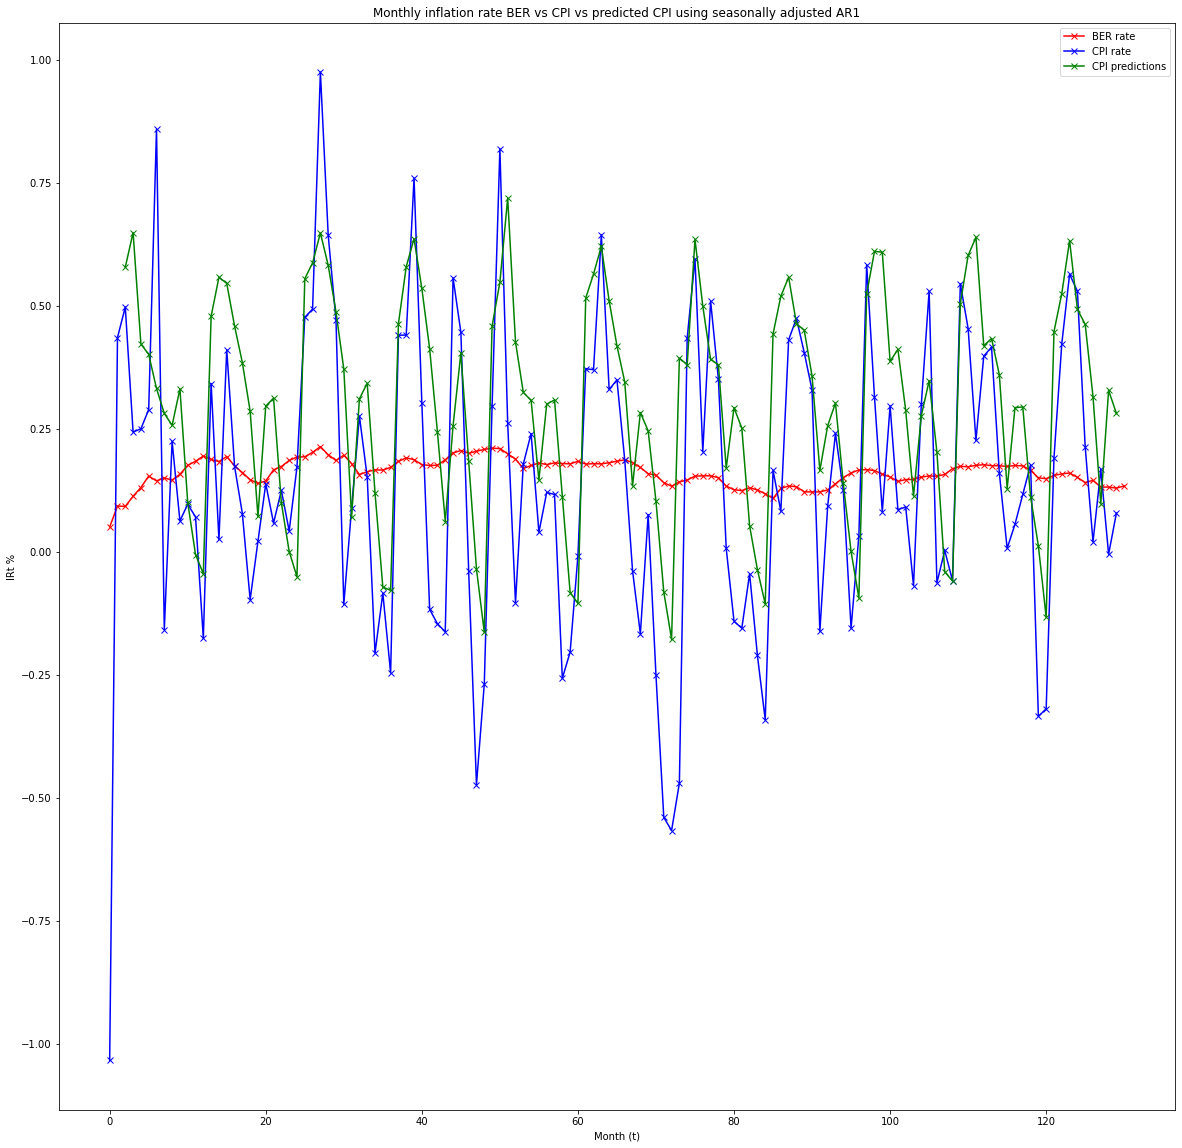

In [7]:
#plot the 2 rates
df_ber_irt[(df_ber_irt['year']==2008) & (df_ber_irt['month']==7)] 
ber_offset = 72

fid = plt.figure(figsize=(20,20))
plt.title("Monthly inflation rate BER vs CPI vs predicted CPI using seasonally adjusted AR1")
plt.xlabel("Month (t)")
plt.ylabel("IRt %")

plt.plot(np.arange(len(df_ber_irt['ber_rate'][ber_offset:])),df_ber_irt['ber_rate'][ber_offset:],'r-x',label='BER rate')
plt.plot(np.arange(len(df_cpi['IRt'])-6),df_cpi['IRt'][6:],'b-x',label='CPI rate')
plt.plot(np.arange(2,len(df_cpi_ar1['AR1_predictions'])),100*df_cpi_ar1['AR1_predictions'][2:],'g-x',label='CPI predictions')
plt.legend()
plt.show()

In [8]:
#TODO: generate IRT then redo the offset
df_cpi['IRt'].mean()

0.11832916537975127

In [9]:
df_ber_irt['ber_rate'][ber_offset:].mean()

0.1615170676660315

In [10]:

df_ber_irt[65:]

,year,month,T10YIE,ber_rate
,,,mean,
65,2008,6,2.470952,0.203617
66,2008,7,2.438636,0.200983
67,2008,8,2.209524,0.182288
68,2008,9,1.836190,0.151743
69,2008,10,1.061818,0.088057
...,...,...,...,...
198,2019,7,1.752727,0.144900
199,2019,8,1.586364,0.131245
200,2019,9,1.587000,0.131298


In [11]:
df_ber_irt[df_ber_irt['year'] == 2013]
#df_data[df_data['date'] < '2013-09-01']

,year,month,T10YIE,ber_rate
,,,mean,
120,2013,1,2.523333,0.207884
121,2013,2,2.554737,0.210442
122,2013,3,2.542500,0.209445
123,2013,4,2.411364,0.198760
124,2013,5,2.283182,0.188303
125,2013,6,2.048500,0.169126
126,2013,7,2.122273,0.175159
127,2013,8,2.184545,0.180248
128,2013,9,2.145500,0.177057


In [12]:
df_cpi[df_cpi['date'] == '2013-09-01']

,date,CPI,IRt,IRt_log
62,2013-09-01,106.8835,0.120275,0.120275


In [13]:
df_ber_irt[ber_offset-6:]

,year,month,T10YIE,ber_rate
,,,mean,
66,2008,7,2.438636,0.200983
67,2008,8,2.209524,0.182288
68,2008,9,1.836190,0.151743
69,2008,10,1.061818,0.088057
70,2008,11,0.638333,0.053039
...,...,...,...,...
198,2019,7,1.752727,0.144900
199,2019,8,1.586364,0.131245
200,2019,9,1.587000,0.131298


In [14]:
df_cpi.head()

,date,CPI,IRt,IRt_log
0,2008-07-01,100.00000,0.000000,0.000000
1,2008-08-01,100.52510,0.525100,0.525100
2,2008-09-01,100.12380,-0.399204,-0.399204
3,2008-10-01,99.98538,-0.138249,-0.138249
4,2008-11-01,98.97539,-1.010138,-1.010138


ber length: 61 cpi: length 61


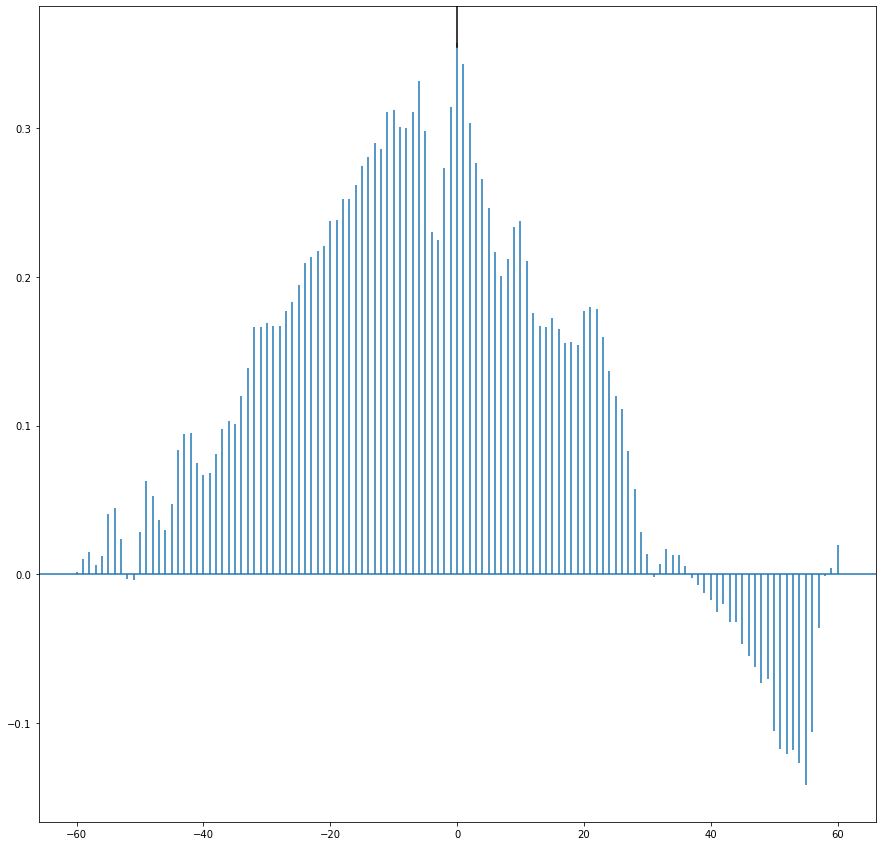

maximum correlation: 0.357072467389606 at 0


In [15]:
#TODO: these should only be on the training data not all data!!!!
ber_train_end = 128
cpi_train_end = 62

ber = df_ber_irt['ber_rate'][ber_offset-5:ber_train_end].to_numpy()
cpi = df_cpi['IRt'][1:cpi_train_end].to_numpy()
print(f"ber length: {len(ber)} cpi: length {len(cpi)}")
#correlation = np.correlate(cpi,ber,"full")
plt.figure(figsize=(15,15))
(lags,c,line,b) = plt.xcorr(ber,cpi,maxlags=None)
plt.axvline(ymin=0.95,c='k')
plt.show()
print (f"maximum correlation: {max(c)} at {lags[np.argsort(-c)[0]]}")

Yaaay its correct!

Fit a new  model to the  inflation rate with these external regressors and the most appropriate lag. Report the coefficients. Python Tip: You may use sm.tsa.statespace.SARIMAX.